## Problem Statement
The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. 
- Apply EDA 
- statistical methods 
- Machine learning algorithms<br>
in order to get meaningful information from it. 

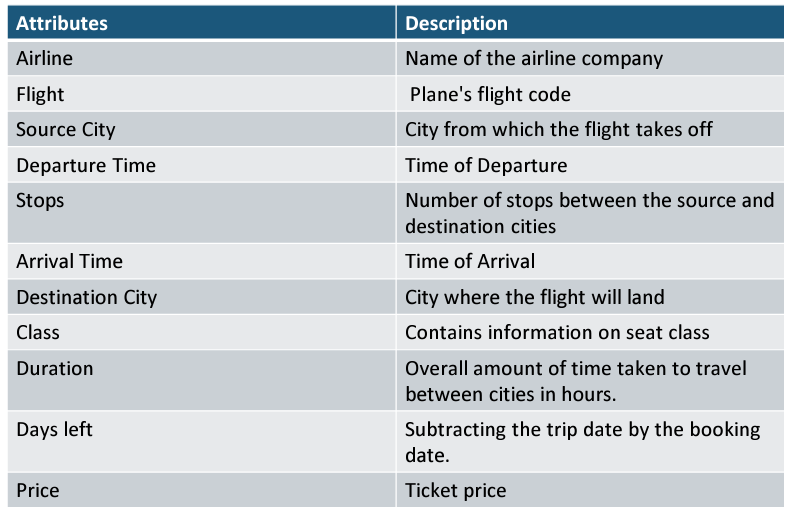

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Flight_Booking.csv')

## Data Cleaning
- Since the data has been loaded now next step are to 
    * Check consistency, null counts, tidyness of the data.
    * Clean the unclean data.

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Observations:**
- Columns `Unnamed: 0` and `flight` represent the index and flight number code.
- Both of the columns won't be helpful as they don't contain any information about flight price.
- We will drop both the columns.

In [4]:
df = df.drop(columns= ['Unnamed: 0', 'flight'])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
print(f"""No. of observations in the Dataset: {df.shape[0]}
No. of features in the Dataset: {df.shape[1]}""")

No. of observations in the Dataset: 300153
No. of features in the Dataset: 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [7]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [8]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

**Observations:**
- Dataset contains 3 lac (300k) records and 10 features.
- There are no null value present in the dataset.
- Also features are consistent with the data type.
- Individual features `source_city` and `destination_city` won't be adding any valuable information to explain our target feature `price`
- Therefore we will construct a new feature `route` which will be of the form: `source_city` to `destination_city`

In [9]:
## constructing new feature
df['route'] = 0
df['route'] = df['source_city']+ ' to ' +df['destination_city']
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai


## Exploratory Data Analysis:
- Now the data is cleaned and consistent, we will explore the data and 
    - will gain some insights
    - will find the patterns

### Helper Functions for visualization

In [10]:
def price_dist(column):
    
    ## computing no. of columns and rows for subplot
    categories = df[column].value_counts().index
    unique = len(categories)
        
    #plt.figure(figsize = (12,8))
    #sns.histplot(data = df, x = 'price', hue= column)
    #plt.show()
    
    ncols = 3
    nrows = int(np.ceil(unique/ncols))
    
    ## creating subplots
    plt.subplots(nrows = nrows, ncols= ncols, figsize = (12,8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    for i in range(unique):
        num = i+1
        mean = df.groupby(by = column).mean().loc[categories[i], 'price']
        plt.subplot(nrows, ncols, num)
        sns.histplot(df.loc[df[column] == categories[i]]['price'], kde = True, color = colors[i])
        plt.axvline(x = mean, linestyle = '--', color = 'r', label = 'Mean Price')
        plt.title(f"Distribution of Flight Booking Price" + "\n" + f"for {column} {categories[i]}")
        plt.legend()
        plt.text(x = mean+500, y = 600, s = str(np.round(mean, 2)), weight = 'black', rotation = 'vertical')
    
    plt.subplots_adjust(wspace = 0.3,
                       hspace = 0.4)

In [11]:
def cat_freq_plot(index, column):
    
    crosstab = pd.crosstab(index = df[index],
                           columns = df[column],
                           margins= True).sort_values(by= 'All', ascending= False)
    
    cat_len = len(crosstab.index[1:])
    col_cat = len(crosstab.columns[:-1])
    
    for y, idx in enumerate(crosstab.index[1:]):
        
        width = []
        for col in crosstab.columns[:-1]:
            wd = (crosstab.loc[idx, col]/crosstab.loc[idx, 'All'])
            width.append(wd)
            
        colors = ['#8c564b','#2ca02c','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']   
        left = 0
        for j in range(col_cat):
            
            plt.barh(y = idx, width = width[j], left = left, color = colors[j])
            left = left + width[j]
            
        #plt.barh(y = idx, width = width[0], color = 'teal')
        #plt.barh(y = idx, width = width[1], color = 'darkseagreen',
                 #left= width[0])
        
        
        
        #x_pos = 0
        #for i in range(col_cat):
            
            #x_pos = x_pos + width[i]/2
            
            #if width[i]>0:
                #s = str(np.round(width[i],2)*100)
            #else:
                #continue 
                
            #plt.text(x = x_pos, y = y, s = s + '%')
            
            #x_pos = x_pos*2
            
        plt.ylabel(index)
        plt.xlabel('Proportion')
        plt.xticks(np.arange(0,1.05,0.05), rotation = 90)
        plt.legend(crosstab.columns[:-1])
        plt.title(f"Proportion of {column} for {index}", weight = 'black')

### Exploring target variable

In [12]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

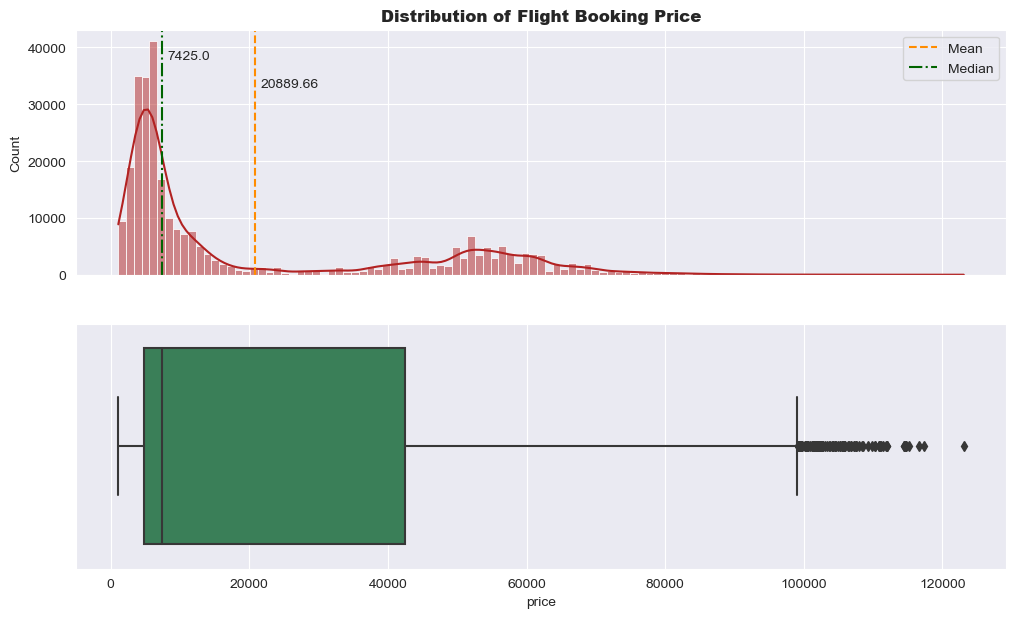

In [13]:
plt.subplots(2, 1, figsize = (12,7), sharex= True)
plt.subplot(211)
sns.histplot(data = df, x= 'price', kde = True, color= 'firebrick')
mean = df['price'].mean()
median = df['price'].median()
plt.axvline(x = mean, linestyle = '--', color = 'darkorange', label = 'Mean')
plt.axvline(x = median, linestyle = '-.', color = 'darkgreen', label = 'Median')
plt.text(x = mean + 800, y = 33000, s = np.round(mean, 2))
plt.text(x = median + 800, y = 38000, s = np.round(median, 2))
plt.title('Distribution of Flight Booking Price', weight = 'black')
plt.legend()

plt.subplot(212)
sns.boxplot(data = df, x = 'price', color= 'seagreen')
plt.show()

**Observations:**
- Distribution of flight booking price is positively skewed with mean price `20889.6`, median price `7425.0`.
- 50% of the flight booking price are below 7425 whereas remaining are spread withing the range `7425.0` to `123071.0`
- Outliers are visible from the box plot, further investigation for outlier is necesary before deleting the observations.

### Exploring Descriptive Features

**1) Airline**

In [14]:
airline_df = pd.DataFrame(df['airline'].value_counts()).rename(columns = {'airline': 'count'})
airline_df['mean_price'] = df.groupby(by = 'airline').mean()['price']
airline_df = airline_df.sort_values(by = 'count', ascending= False)
airline_df

,count,mean_price
Vistara,127859,30396.536302
Air_India,80892,23507.019112
Indigo,43120,5324.216303
GO_FIRST,23173,5652.007595
AirAsia,16098,4091.072742
SpiceJet,9011,6179.278881


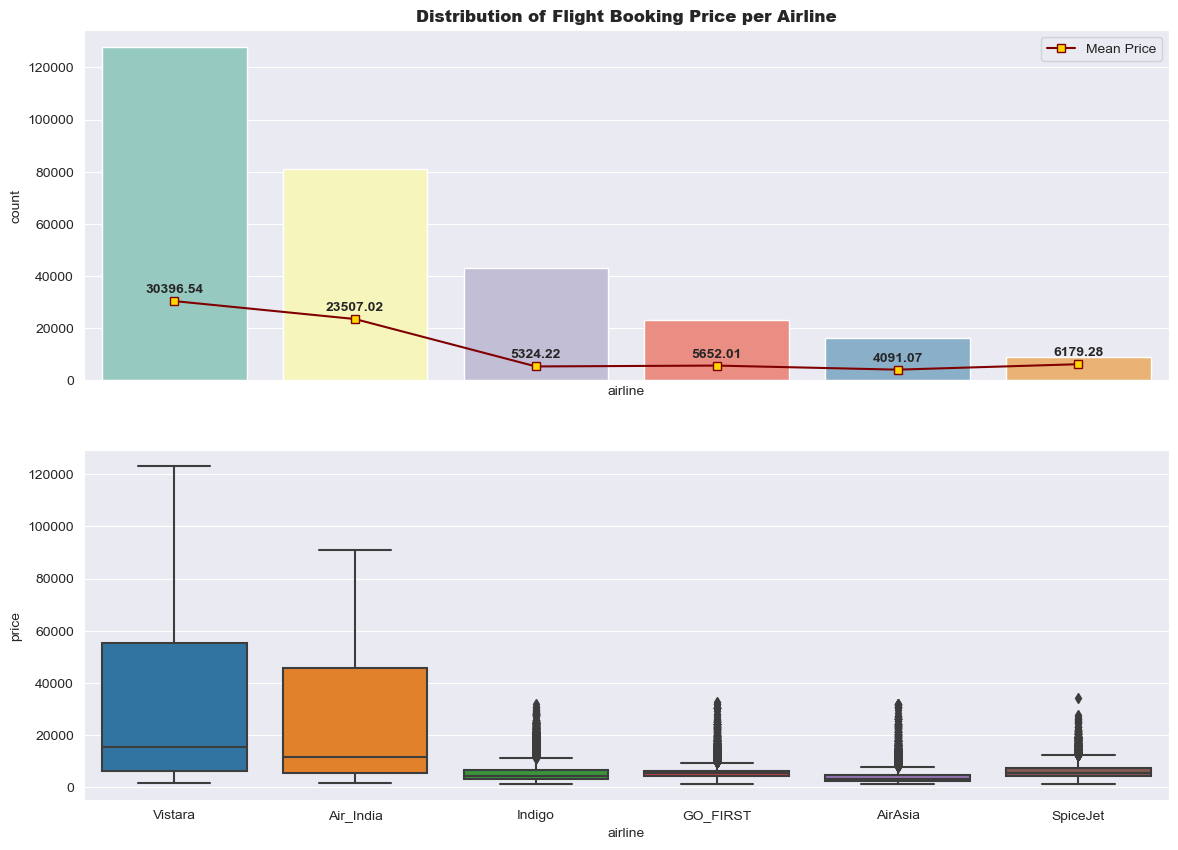

In [15]:
plt.subplots(2, 1, figsize = (14,10), sharex= True)
plt.subplot(211)
sns.countplot(data = df, x = 'airline',
              order = df['airline'].value_counts().index,
             palette= 'Set3')
plt.plot(airline_df['mean_price'], marker = 's', color = 'maroon', mfc = 'gold', label = 'Mean Price')
plt.xticks(ticks = list(range(0,6)), labels = df['airline'].value_counts().index.to_list())
plt.legend()
for x in range(len(airline_df)):
    y = airline_df['mean_price'][x]
    plt.text(x = x, y = y+3200, s = np.round(y,2), ha = 'center', weight = 'bold')
    
plt.title("Distribution of Flight Booking Price per Airline", weight = 'black')
    
plt.subplot(212)
sns.boxplot(data =df, x = 'airline', y = 'price', order= df['airline'].value_counts().index)
plt.show()

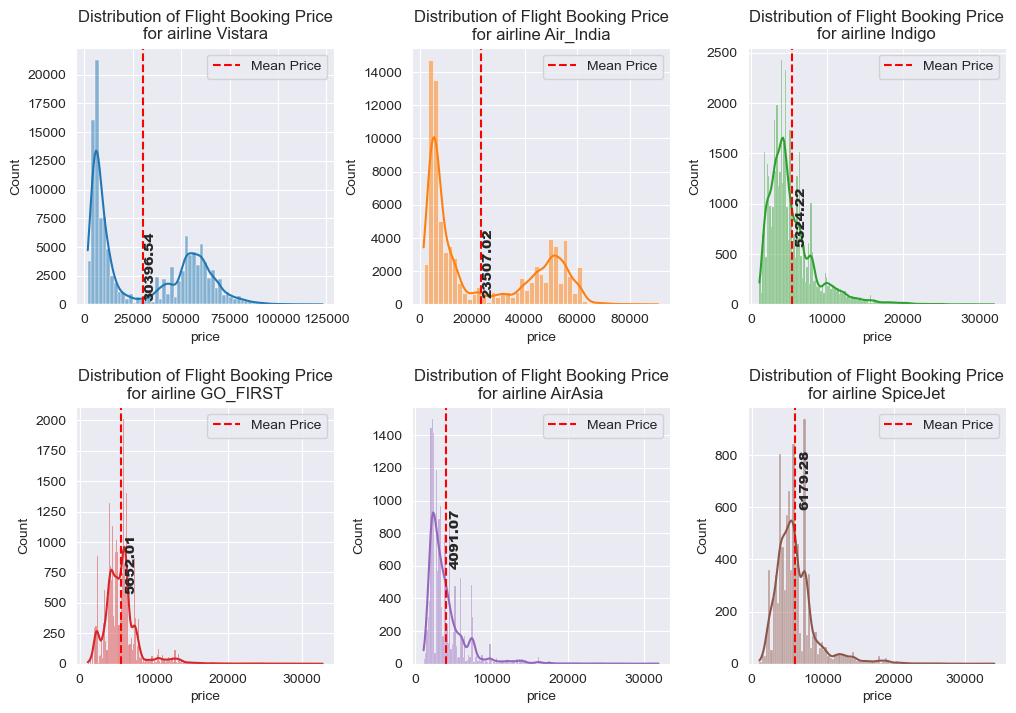

In [16]:
price_dist('airline')

**Observations:**
- Distribution of flight booking price for every sing airline is positively skewed.
- Airlines `Vistara` and `Air_India` are bimodal where the first mode for `Vistara` is between the price range 0 to 25000 and second mode is between price range 50,000 to 70,000
- First mode for `Air_India` is between the price range 0 to 23000 and second mode is between price range 40,000 to 60,000.
- `Vistara` airline has highest flight count with highest average flight booking price 30,396
- `SpiceJet` airline has lowest flight count with flight booking price average 6,179
- `AirAsia` airline has lowest flight booking price average 4,091

**2) Source City, Destination City and Route**

In [17]:
source_dest_df = pd.DataFrame(df['source_city'].value_counts()).rename(columns = {'source_city': 'source_count'})
source_dest_df['destination_count'] = df['destination_city'].value_counts()
source_dest_df

,source_count,destination_count
Delhi,61343,57360
Mumbai,60896,59097
Bangalore,52061,51068
Kolkata,46347,49534
Hyderabad,40806,42726
Chennai,38700,40368


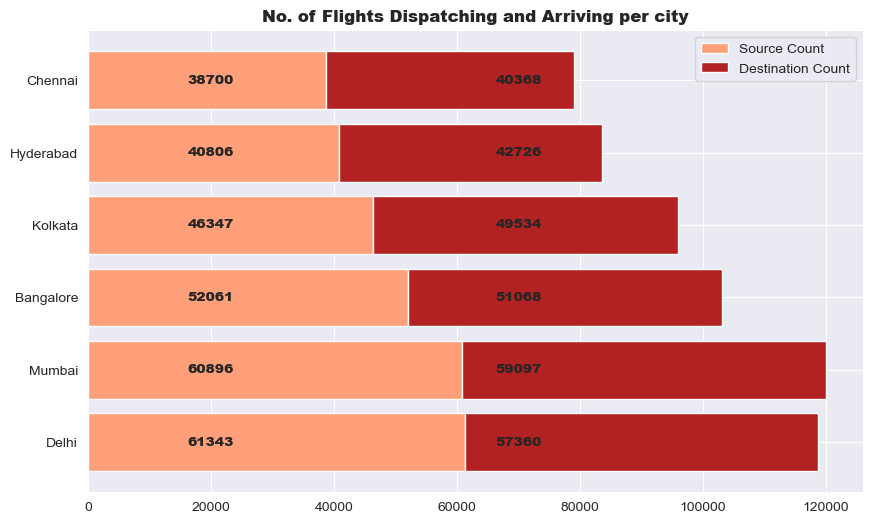

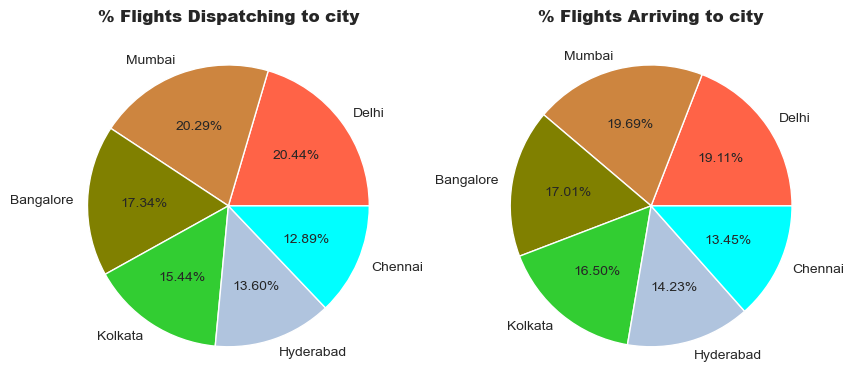

In [18]:
plt.figure(figsize = (10,6))
for i, idx in enumerate(source_dest_df.index):
    left = 0
    x_pos = [20000, 70000]
    colors = ['lightsalmon', 'firebrick','#7f7f7f', '#d62728', '#9467bd',  '#e377c2', '#bcbd22',  '#1f77b4', '#ff7f0e', '#2ca02c']
    for j, col in enumerate(source_dest_df.columns):
        width = source_dest_df.loc[idx,col]
        plt.barh(y = idx, width = width, left = left, color = colors[j])
        plt.text(x = x_pos[j], y = i, s = width, ha = 'center', va= 'center', weight = 'black')
        left = left + width

plt.legend(['Source Count', 'Destination Count'])
plt.title("No. of Flights Dispatching and Arriving per city", weight = 'black')
plt.show()

plt.subplots(1,2, figsize = (10,6))

plt.subplot(121)
plt.pie(x = source_dest_df['source_count'],
       labels = source_dest_df.index,
       colors = ['tomato', 'peru', 'olive', 'limegreen', 'lightsteelblue', 'aqua'],
       autopct = '%.2f%%'
       )
plt.title("% Flights Dispatching to city", weight = 'black')

plt.subplot(122)
plt.pie(x = source_dest_df['destination_count'],
       labels = source_dest_df.index,
       colors = ['tomato', 'peru', 'olive', 'limegreen', 'lightsteelblue', 'aqua'],
       autopct = '%.2f%%'
       )
plt.title("% Flights Arriving to city", weight = 'black')
plt.show()

In [19]:
route_df = df.groupby(by = 'route').mean()
route_df['frequency'] = df['route'].value_counts() 
route_df = route_df.sort_values(by = 'frequency', ascending= False)

In [20]:
def count_plot(column):
    sns.countplot(data = df, x = column, order = df[column].value_counts().index, palette='Set2')
    for x, y in enumerate(df[column].value_counts().values):
        plt.text(x, y/2, s = y, ha = 'center', weight = 'bold', va = 'center', rotation = 'vertical')
    plt.xticks(rotation = 90)
    plt.title(f"Total number of flights per {column}", weight = 'black')


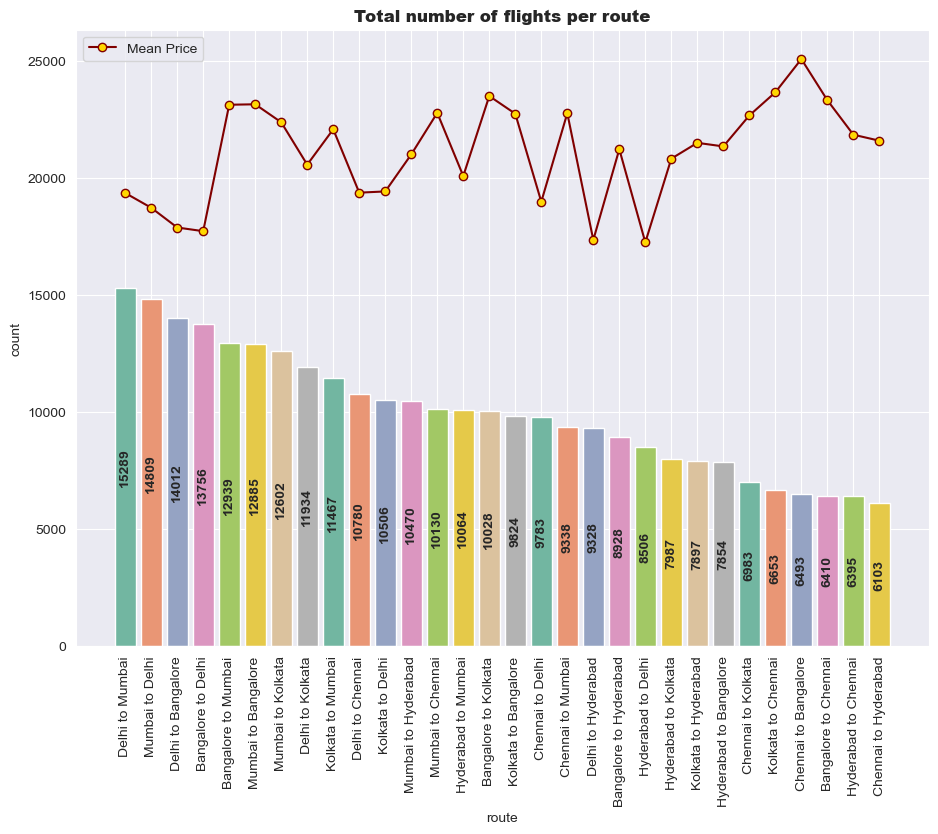

In [21]:
plt.subplots(figsize = (11,8))
count_plot('route')
route_df['price'].plot(kind = 'line', color = 'maroon', marker = 'o',mfc = 'gold', label = 'Mean Price')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

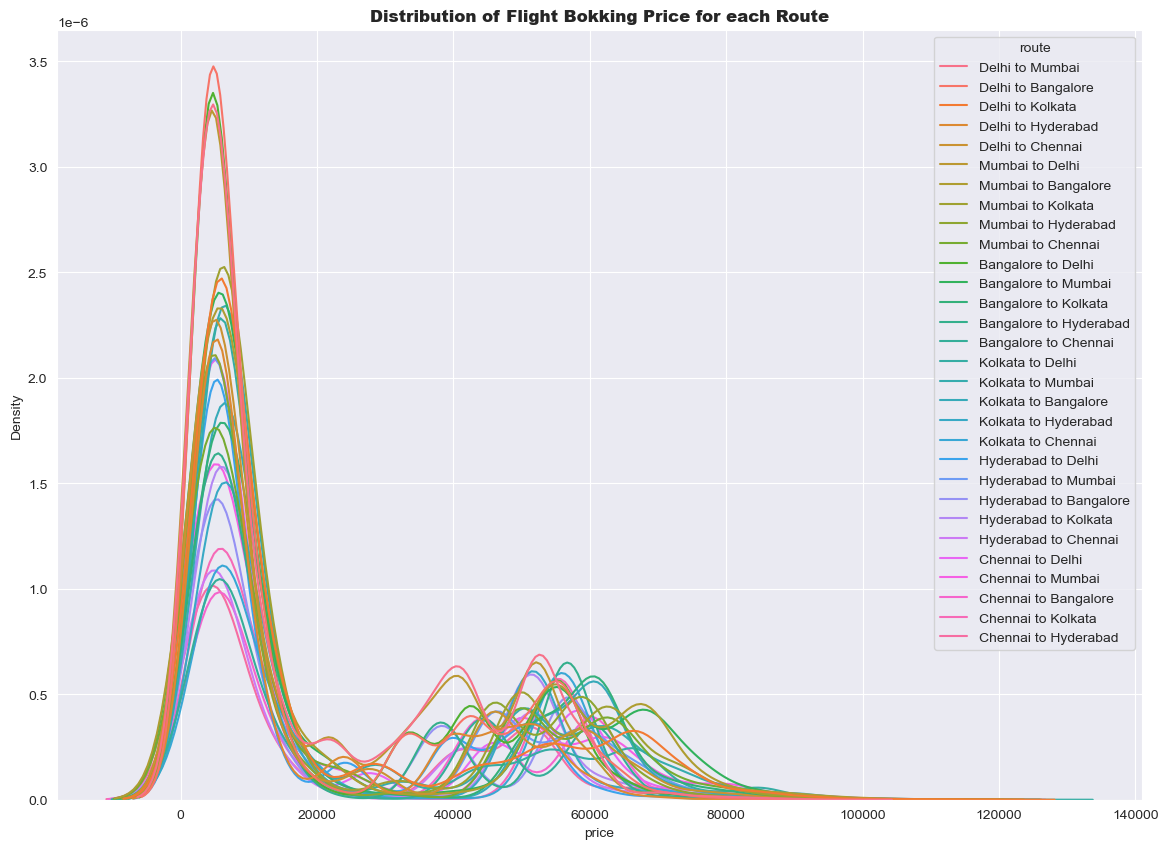

In [22]:
plt.figure(figsize = (14,10))
sns.kdeplot(data = df, x = 'price', hue = 'route')
plt.title("Distribution of Flight Bokking Price for each Route", weight = 'black')
plt.show()

**Observations:**
- `Delhi to Mumbai` and `Mumbai to Delhi` are the most busiest route in terms of flight booking count.
- Also, the mean flight booking price for `Delhi to Mumbai` and `Mumbai to Delhi` routes is low compare to the other routes.
- Highest mean flight booking price is for `Chennai to Bangalore` whereas lowest mean flight booking price is for `Delhi to Hyderabad` and `Hyderabad to Delhi`.
- `Chennai to Hyderabad` route has lowest flight frequency.

**3) Class**

In [23]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

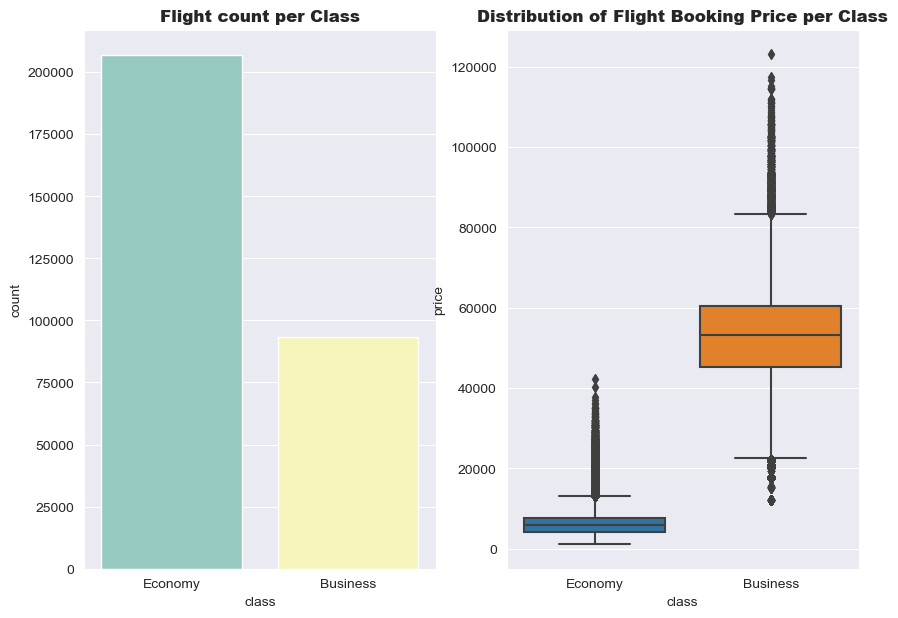

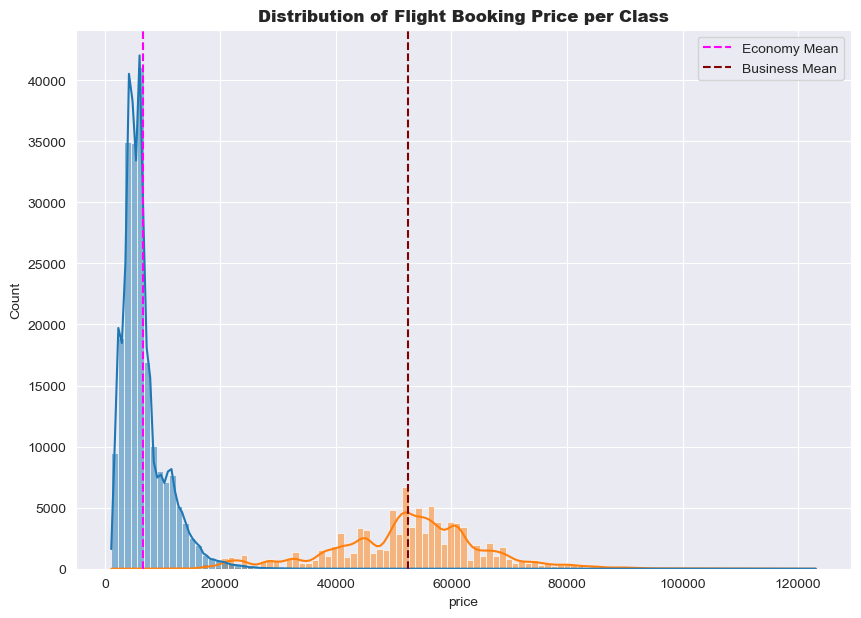

In [24]:
plt.subplots(1, 2, figsize = (10,7), sharex= True)
plt.subplot(121)
sns.countplot(data = df, x = 'class',
              order = df['class'].value_counts().index,
             palette= 'Set3')
plt.title("Flight count per Class", weight = 'black')

   
plt.subplot(122)
sns.boxplot(data =df, x = 'class', y = 'price', order= df['class'].value_counts().index)

plt.title("Distribution of Flight Booking Price per Class", weight = 'black')
plt.show()


ec_mean = df.loc[df['class'] == 'Economy']['price'].mean()
bz_mean = df.loc[df['class'] == 'Business']['price'].mean()

plt.figure(figsize = (10,7))
sns.histplot(data = df, x = 'price', hue = 'class', kde = True)
plt.axvline(x = ec_mean, linestyle = '--', color = 'magenta', label = 'Economy Mean')
plt.axvline(x = bz_mean, linestyle = '--', color = 'maroon', label = 'Business Mean')
plt.title("Distribution of Flight Booking Price per Class", weight = 'black')
plt.legend()
plt.show()

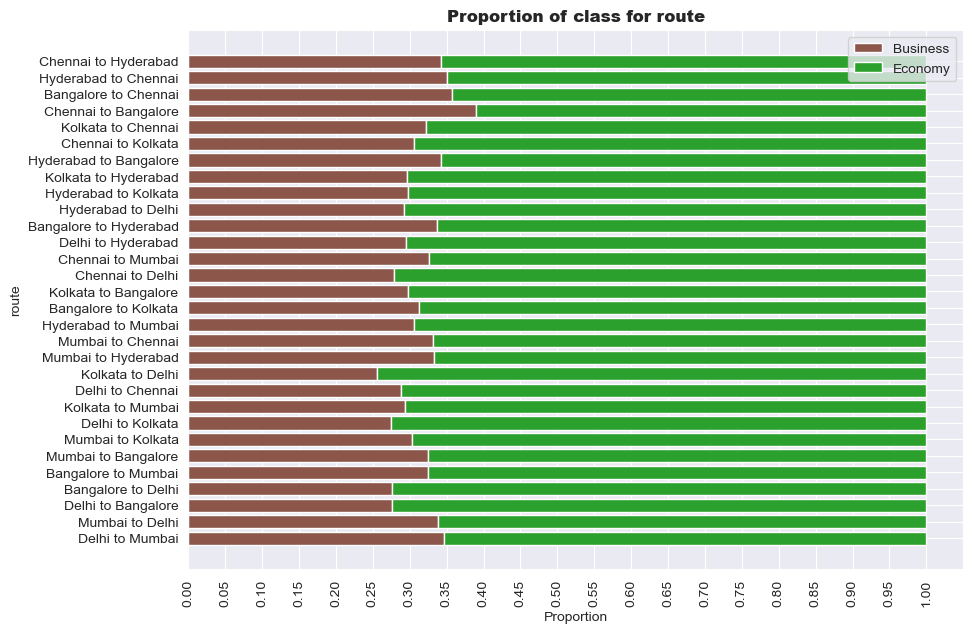

In [25]:
plt.figure(figsize = (10,7))
cat_freq_plot('route', 'class')
plt.show()

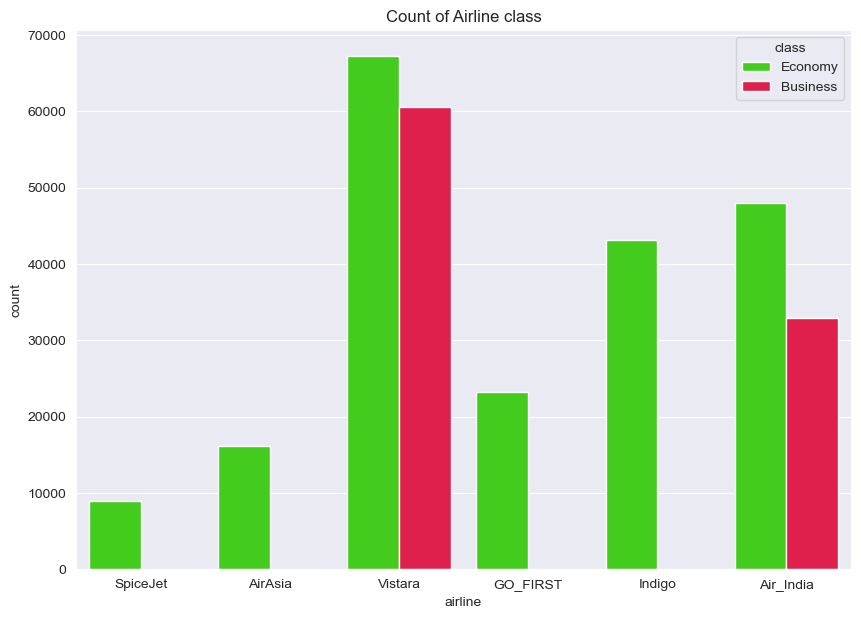

In [26]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'airline', hue = 'class', palette='prism')
plt.title("Count of Airline class")
plt.show()

**Observations:**
- Only `Vistara` and `Air India` has business class.
- `Chennai to Bangalore` route has highest proportion of business class flights, this justifies the highes mean flight booking price for the root.
- Mean flight booking price for `Economy` class is 6572 and mean flight booking price for `Business` class is 52540

**4) Departure time and Arrival time:**

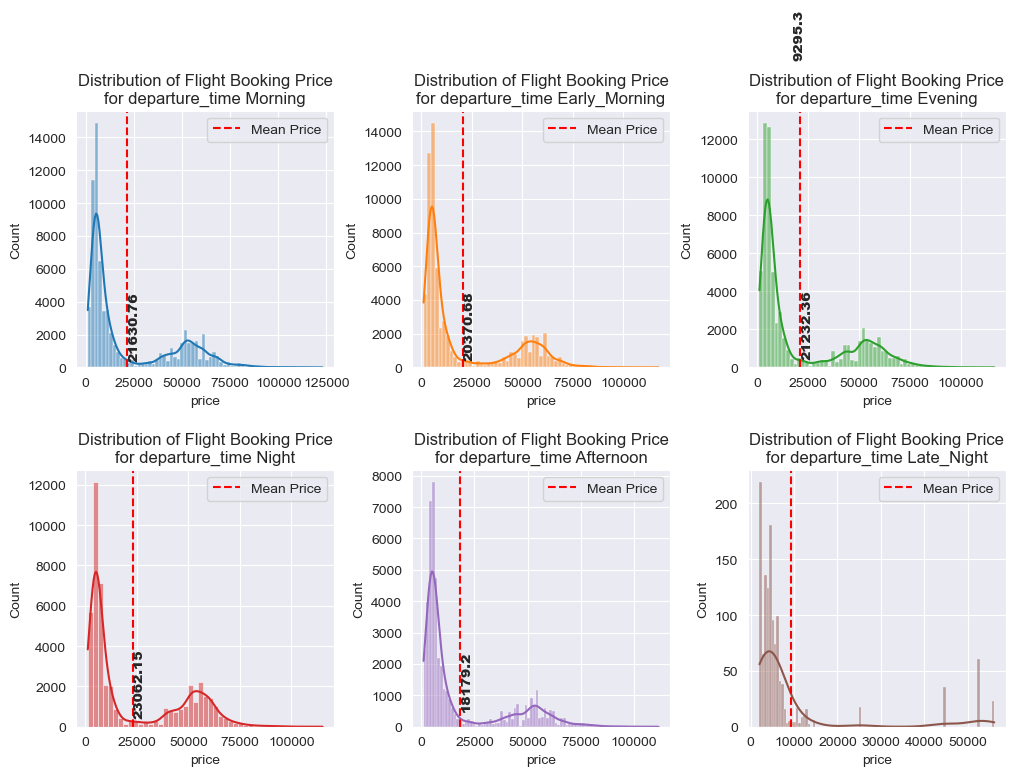

In [27]:
price_dist('departure_time')

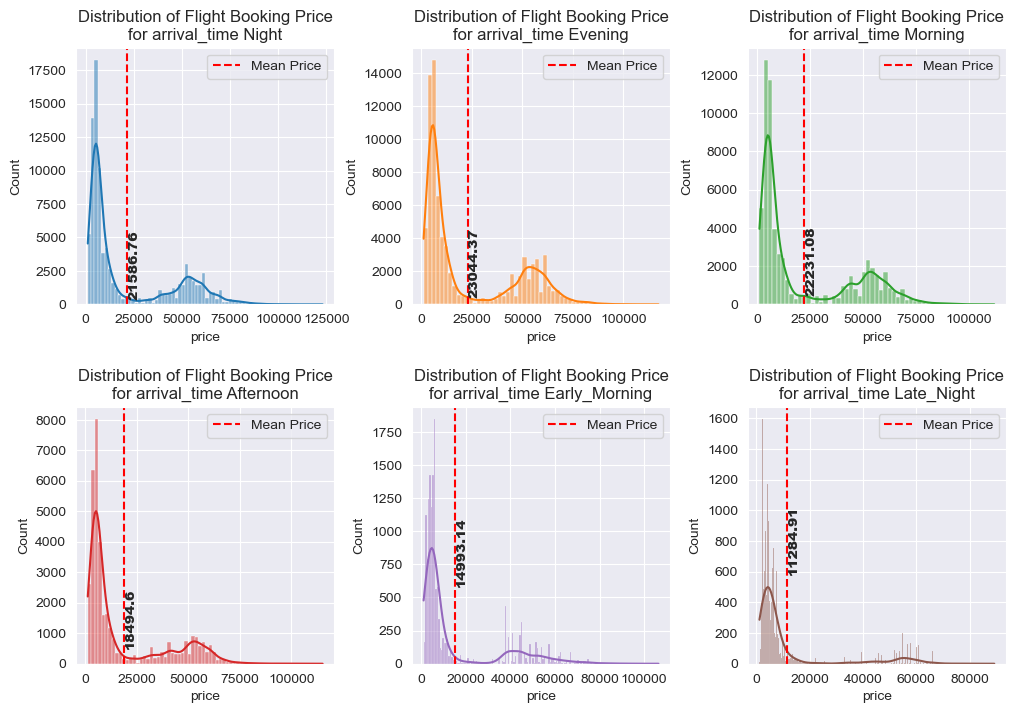

In [28]:
price_dist('arrival_time')

In [29]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai


**5) Days Left:**

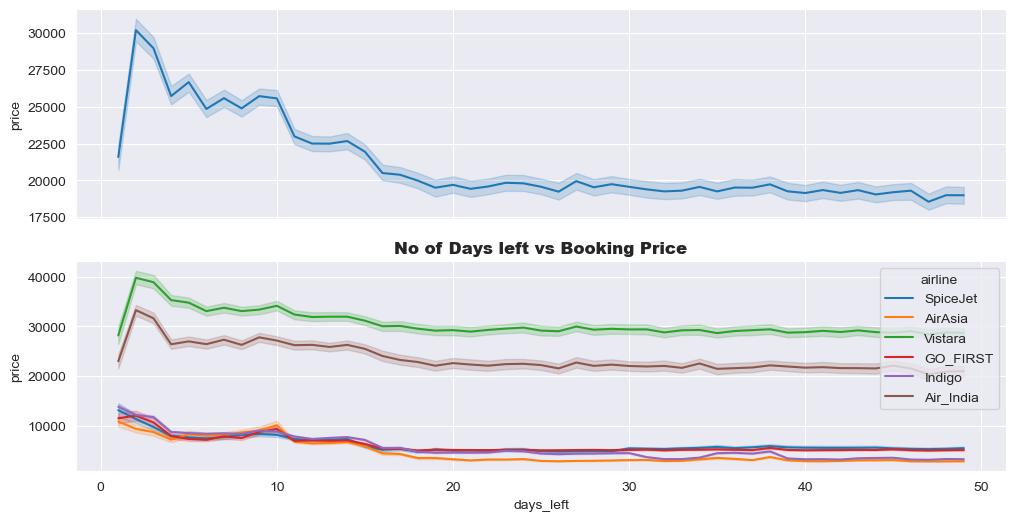

In [30]:
plt.subplots(2,1, figsize = (12,6), sharex= True)
plt.subplot(211)
sns.lineplot(data = df, x = 'days_left', y = 'price')
plt.subplot(212)
sns.lineplot(data = df, x = 'days_left', y = 'price', hue = 'airline')
plt.title("No of Days left vs Booking Price", weight = 'black')
plt.show()

**Observations:**
- The price of the ticket increases as the days left for departure decreases

## Data Preprocessing

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['source_city', 'destination_city', 'price']) #dropping redundant feature and a target column for X
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                   random_state= 42)

print(f"""Train set size {X_train.shape, y_train.shape}
Test set size {X_test.shape, y_test.shape}""")

Train set size ((240122, 8), (240122,))
Test set size ((60031, 8), (60031,))


In [32]:
ordinal_cols = ['departure_time', 'arrival_time','stops']
ohe_cols = ['airline', 'route', 'class']
std_scaler_cols = ['duration', 'days_left']

**Handdling Categorical Feature:**

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

categories = ['Early_Morning','Morning','Afternoon', 'Evening', 'Night', 'Late_Night' ]
stop_categories = ['zero', 'one', 'two_or_more']

o_enc = OrdinalEncoder(categories = [categories, categories, stop_categories])
ohe = OneHotEncoder()

ct = ColumnTransformer(transformers=[('ordinal', o_enc, ordinal_cols),
                                     ('OneHot', ohe, ohe_cols)],
                      remainder= 'passthrough')
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

## Model Building

In [34]:
X_train_model, X_val_model, y_train_model, y_val_model = train_test_split(X_train_enc, y_train,
                                                                         test_size=0.2,
                                                                         random_state=42)

print(f"""Train set size {X_train_model.shape, y_train_model.shape}
Test set size {X_val_model.shape, y_val_model.shape}""")

Train set size ((192097, 43), (192097,))
Test set size ((48025, 43), (48025,))


### Experiment 1

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_model, y_train_model)
y_pred_lr = lr.predict(X_val_model)
RMSE_lr = np.sqrt(mean_squared_error(y_val_model, y_pred_lr))
R2_lr = r2_score(y_val_model, y_pred_lr)

print(f"""Root Mean Square Error of the Linear Regression model is: {RMSE_lr}
R2 score of the Linear Regression model is: {R2_lr}""")

Root Mean Square Error of the Linear Regression model is: 6763.514203117827
R2 score of the Linear Regression model is: 0.9111297742205544


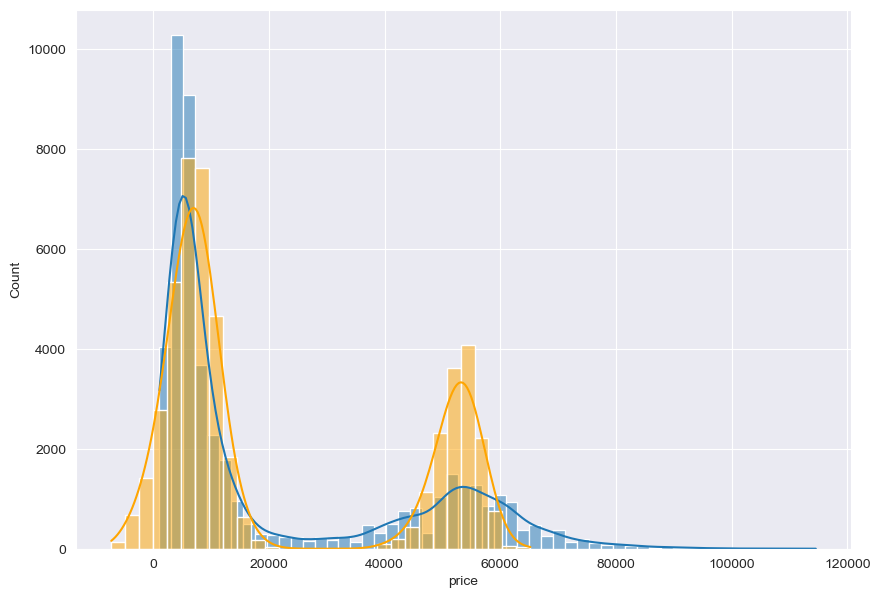

In [36]:
plt.figure(figsize = (10,7))
sns.histplot(y_val_model, kde = True)
sns.histplot(y_pred_lr, kde = True, color = 'orange')
plt.show()

In [37]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle=True, random_state = 42)


In [38]:
from sklearn.model_selection import learning_curve

In [39]:
def learning_curve_plot(X, y, estimator,cv = 10, ):
    sizes = np.arange(0.1,1.1,0.1)
    train_sizes, train_scores, test_scores = learning_curve(estimator = estimator,
                                                        X = X, y = y,
                                                        train_sizes= sizes,
                                                        cv = cv,
                                                        random_state=42)
    scores = [train_scores, test_scores]
    colors = ['firebrick', 'lightseagreen']
    for i, score in enumerate(scores):
        mean_score = np.mean(score, axis =1)
        plt.plot(sizes, mean_score, marker = 'd', color = colors[i], mfc= 'gold')

    plt.ylabel("KFold Cross Validated Accuracy")
    plt.xlabel("Training Set Sizes")
    plt.title("Learning Curve for KFold Cross Validated Model", weight = 'black')
    plt.legend(['Training Accuracy', 'Testing Accuracy'])
    plt.show()
    

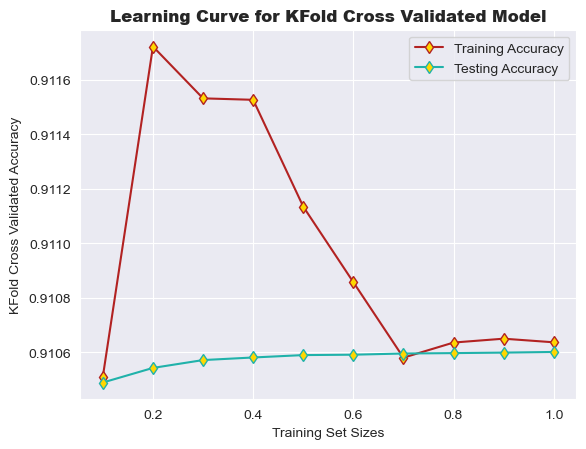

In [40]:
learning_curve_plot(X_train_enc, y_train,LinearRegression(), kf)

In [92]:
error_df = pd.DataFrame()
error_df['Actual'] = y_val_model
error_df['Predicted'] = y_pred_lr
error_df['Residual'] = y_val_model - y_pred_lr
error_df['Abs_res'] = np.abs(error_df['Residual'])
error_df['Std_res'] = error_df['Residual']/RMSE_lr
error_df.head()

,Actual,Predicted,Residual,Abs_res,Std_res
72000,7584,6251.749828,1332.250172,1332.250172,0.196976
105577,5021,8472.281094,-3451.281094,3451.281094,-0.510279
81058,5943,7193.054693,-1250.054693,1250.054693,-0.184823
238715,45693,51672.923344,-5979.923344,5979.923344,-0.884144
37245,7426,6108.743909,1317.256091,1317.256091,0.194759


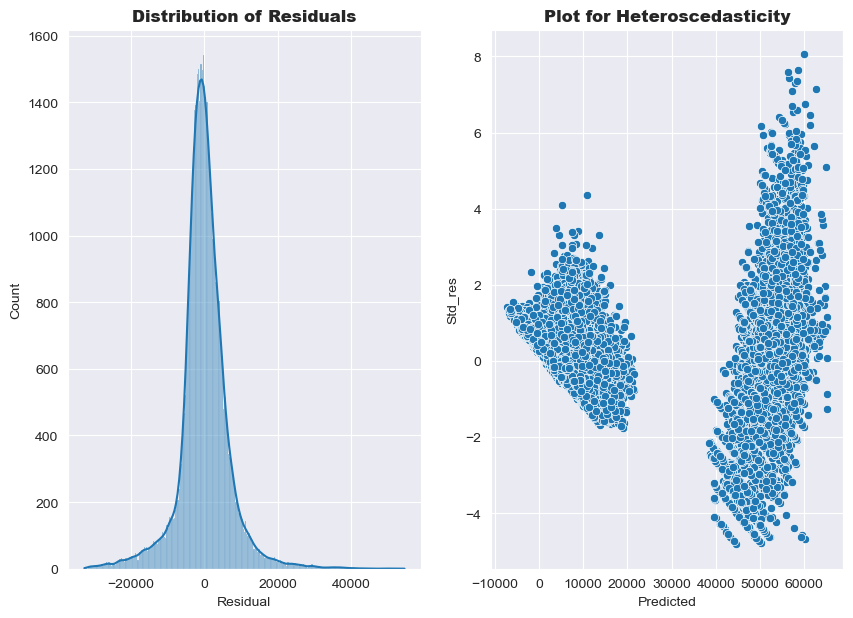

In [94]:
plt.subplots(1,2, figsize = (10,7))

plt.subplot(121)
sns.histplot(error_df['Residual'], kde = True)
plt.title("Distribution of Residuals", weight = 'black')

plt.subplot(122)
sns.scatterplot(x = 'Predicted', y = 'Std_res', data = error_df)
plt.title("Plot for Heteroscedasticity", weight = 'black')

plt.show()

## Experiment 2

In [70]:
X_train.head()

,airline,departure_time,stops,arrival_time,class,duration,days_left,route
148417,Air_India,Afternoon,one,Morning,Economy,19.42,6,Kolkata to Chennai
36879,Indigo,Afternoon,two_or_more,Night,Economy,7.00,13,Delhi to Chennai
274531,Air_India,Afternoon,one,Afternoon,Business,21.17,44,Kolkata to Chennai
166397,Vistara,Night,one,Early_Morning,Economy,10.25,11,Hyderabad to Bangalore
272722,Vistara,Night,one,Night,Business,26.50,5,Kolkata to Chennai


In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

categories = ['Early_Morning','Morning','Afternoon', 'Evening', 'Night', 'Late_Night' ]
stop_categories = ['zero', 'one', 'two_or_more']

o_enc = OrdinalEncoder(categories = [categories, categories, stop_categories])
ohe = OneHotEncoder()

ct = ColumnTransformer(transformers=[('ordinal', o_enc, ordinal_cols),
                                     ('OneHot', ohe, ohe_cols)],
                      remainder= 'passthrough')
ct.fit(X_train)
X_train_enc_2 = ct.transform(X_train)
X_test_enc_2 = ct.transform(X_test)

In [72]:
X_train_model_2, X_val_model_2, y_train_model_2, y_val_model_2 = train_test_split(X_train_enc_2, y_train,
                                                                         test_size=0.2,
                                                                         random_state=42)

print(f"""Train set size {X_train_model_2.shape, y_train_model_2.shape}
Test set size {X_val_model_2.shape, y_val_model_2.shape}""")

Train set size ((192097, 43), (192097,))
Test set size ((48025, 43), (48025,))


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr2 = LinearRegression()
lr2.fit(X_train_model_2, y_train_model_2)
y_pred_lr2 = lr2.predict(X_val_model_2)
RMSE_lr2 = np.sqrt(mean_squared_error(y_val_model_2, y_pred_lr2))
R2_lr2 = r2_score(y_val_model_2, y_pred_lr2)

print(f"""Root Mean Square Error of the Linear Regression model is: {RMSE_lr2}
R2 score of the Linear Regression model is: {R2_lr2}""")

Root Mean Square Error of the Linear Regression model is: 6763.514203117827
R2 score of the Linear Regression model is: 0.9111297742205544


In [ ]:
learning_curve_plot(X_train_enc_2, y_train, LinearRegression(), kf)

In [88]:
error_df2 = pd.DataFrame()
error_df2['Actual'] = y_val_model_2
error_df2['Predicted'] = y_pred_lr2
error_df2['Residual'] = y_val_model_2 - y_pred_lr2
error_df2['Abs_res'] = np.abs(error_df2['Residual'])
error_df2['Std_res'] = error_df2['Residual']/RMSE_lr2
error_df2.head()

,Actual,Predicted,Residual,Abs_res,Std_res
72000,7584,6251.749828,1332.250172,1332.250172,0.196976
105577,5021,8472.281094,-3451.281094,3451.281094,-0.510279
81058,5943,7193.054693,-1250.054693,1250.054693,-0.184823
238715,45693,51672.923344,-5979.923344,5979.923344,-0.884144
37245,7426,6108.743909,1317.256091,1317.256091,0.194759


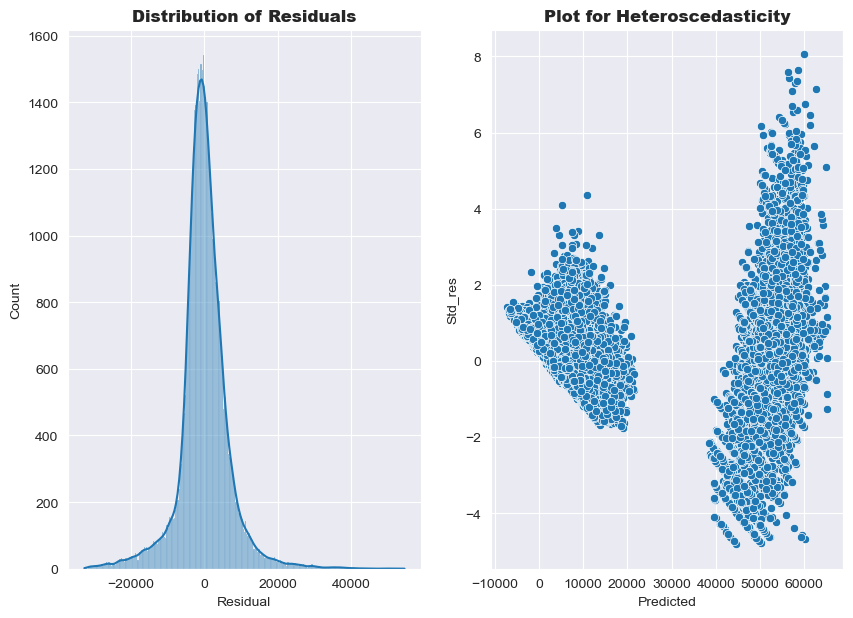

In [91]:
plt.subplots(1,2, figsize = (10,7))

plt.subplot(121)
sns.histplot(error_df2['Residual'], kde = True)
plt.title("Distribution of Residuals", weight = 'black')

plt.subplot(122)
sns.scatterplot(x = 'Predicted', y = 'Std_res', data = error_df2)
plt.title("Plot for Heteroscedasticity", weight = 'black')

plt.show()

In [78]:
error_df['Residual'].skew()

0.24950178925639024

**Observations:**
- We did 2 experiments for Linear Regression Model, 1st experiment is without center scaling numerical feature and 2nd experiment is with center scaling numerical feature
- RMSE and R2 score is approximately same for both the experiments.
- RMSE for the model is  6763.51 whereas model can explain 91% uncertainity in data.
- Learning curve shows the convergence of the traiing and testing accuracies.

**Dignostic Observations:**
- The dataset contains mostly categorical features as compared to numerical features. From the distribution plots of a category per flight booking price plotted in EDA section, we can assume that mean flight booking price is different for different categories. Thus there exists a relationship between Categorical features and target feature.
- There is no Multicoliearity in the model as the VIF for continues variables is less that 5.
- Distribution of residuals implies that residuals of the model are normally distributed with skewnss 0.24
- Scatter plot of Standardize Residuals vs Predicted values implies the presence of Heteroscedasticity.
- To overcome the Heteroscedasticity we can build weighted Least square model or can model a non-linear model.

**Thus the assumption of Homoscedasticity doesn't hold for the given data**

## Experiment 3 

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_model_2, y_train_model_2)
y_pred_dtr = dtr.predict(X_val_model_2)
RMSE_dtr = np.sqrt(mean_squared_error(y_val_model_2, y_pred_dtr))
R2_dtr = r2_score(y_val_model_2, y_pred_dtr)

print(f"""Root Mean Square Error of the Linear Regression model is: {RMSE_dtr}
R2 score of the Linear Regression model is: {R2_dtr}""")

Root Mean Square Error of the Linear Regression model is: 3523.752748498011
R2 score of the Linear Regression model is: 0.9758774993909389


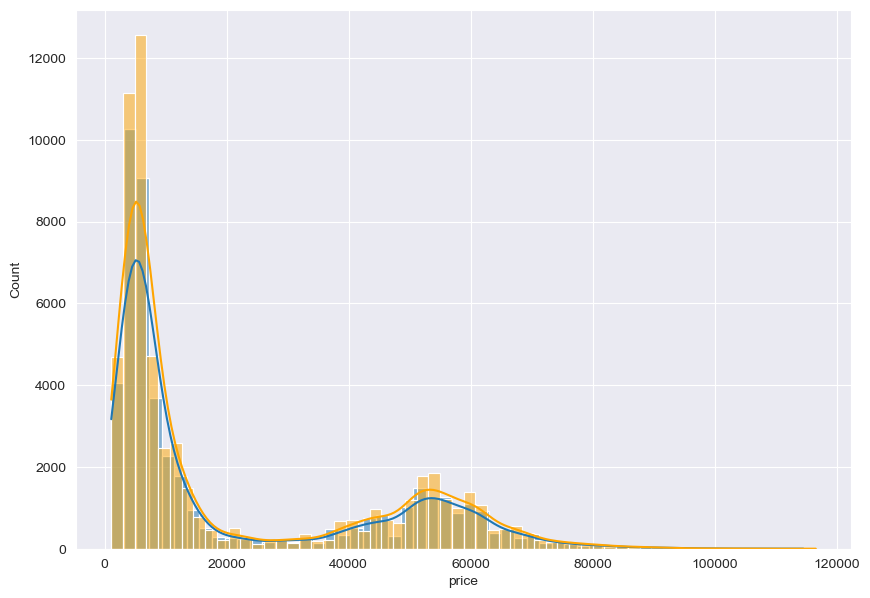

In [87]:
plt.figure(figsize = (10,7))
sns.histplot(y_val_model_2, kde = True)
sns.histplot(y_pred_dtr, kde = True, color = 'orange')
plt.show()

**Observation:**
- A non-linear regression model-1 (Decision Tree) has lowered the RMSE by 48% compared to linear model whereas non-linear model explains the 97.58 % variance which is 7% greater than linear model.


## Experiment 4 

In [105]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train_model_2, y_train_model_2)
y_pred_rfr = rfr.predict(X_val_model_2)
RMSE_rfr = np.sqrt(mean_squared_error(y_val_model_2, y_pred_rfr))
R2_rfr = r2_score(y_val_model_2, y_pred_rfr)

print(f"""Root Mean Square Error of the Linear Regression model is: {RMSE_rfr}
R2 score of the Linear Regression model is: {R2_rfr}""")

KeyboardInterrupt: 

**Observation:**
- A non-linear regression model-2 (Random Forest Regressor) has lowered the RMSE by __% compared to linear model whereas non-linear model explains the __ % variance which is __% greater than linear model.


In [ ]:
models = {'Logistic Regression Model': lr,
         'Decision Tree Model': dt,
         'Random Forest Model': rf}
acc = {}
ncol = 0
for i,model in enumerate(models.items()):
    ncol +=1 
    y_pred = model[1].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    acc[f'{model[0]}'] = accuracy
    
    print(f"""
    ========================================================================================
    {i+1}) {model[0]} Results:
    ========================================================================================
    Confusion Matrix :
    {cm}
    --------------------------------------------------------
    Accuracy Score :{accuracy:.2f}
    --------------------------------------------------------
    Classification Report:
    {report}
    --------------------------------------------------------
    """)
    
    plt.subplot(1, 3, ncol)
    sns.heatmap(cm, annot = True)
    plt.title(f"Confusion Matrix for {model[0]}")
    plt.tight_layout()
    plt.show()

score = list(acc.values())
max_score = sorted(score, reverse = True)[0]

for key in acc.keys():
    if acc[key] == max_score:
        print(f"""
        _____________________________________________________________________________
        Best Model Based on the Accuracies is: {key}
        _____________________________________________________________________________
        """)
   
    

## Model Validation

In [111]:
from sklearn.metrics import mean_absolute_error

models ={'Logistic Regression w/o scaling numerical Feature' : lr,
        'Logistic Regression with scaling': lr2,
        'Decision Tree Regressor': dtr} 
ncol = 0
for i,model in enumerate(models.items()):
    ncol +=1 
    y_pred = model[1].predict(X_test_enc_2)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    print(f"""
    ========================================================================================
    {i+1}) {model[0]} Results:
    ========================================================================================
        i) Mean Absolute Error : {MAE:.2f}
        --------------------------------------------------------
        ii) Root Mean Squared Error :{RMSE:.2f}
        --------------------------------------------------------
        iii) R2 score: {R2:.2f}
        --------------------------------------------------------
    """)


    1) Logistic Regression w/o scaling numerical Feature Results:
        i) Mean Absolute Error : 4506.79
        --------------------------------------------------------
        ii) Root Mean Squared Error :6790.95
        --------------------------------------------------------
        iii) R2 score: 0.91
        --------------------------------------------------------
    

    2) Logistic Regression with scaling Results:
        i) Mean Absolute Error : 4506.79
        --------------------------------------------------------
        ii) Root Mean Squared Error :6790.95
        --------------------------------------------------------
        iii) R2 score: 0.91
        --------------------------------------------------------
    

    3) Decision Tree Regressor Results:
        i) Mean Absolute Error : 1237.47
        --------------------------------------------------------
        ii) Root Mean Squared Error :3614.63
        -------------------------------------------------------

## Conclusion:

- We hva cleaned, explored the data fitted a linear and non-linear regression models on the data for low RMSE and high explainability.
- Since, the Homoskedasticity assumption (assumed from the graph doen't hold for the given data, linear model yields a higher RMSE and relatively low R2 square.
- To overcome the Heteroskedasticity, we've builded a decision tree regressor which yielded 48% low RMSE and 7% more R2 score than that of linear model.
- The distribution of Flight booking price for test set and the distribution of predicted flight booking price from test set implies that the decision tree model explains almost all the variability in test set.
- Further improvements in lowering RMSE and improving R2 score is achieved by building an ensemble model- RandomForest Regressior.
- Random forest regressor lowered RMSE by __% & __% and improved R2 score by __% & __% compared to linear and decision tree model respectively.
- For the prediciton accuracy we can use RandomForest regressor model whereas for interpretability we can use Decision Tree model.
- Finally we compared the all three model performance on unseen data.